## El sesgo (the bias term)

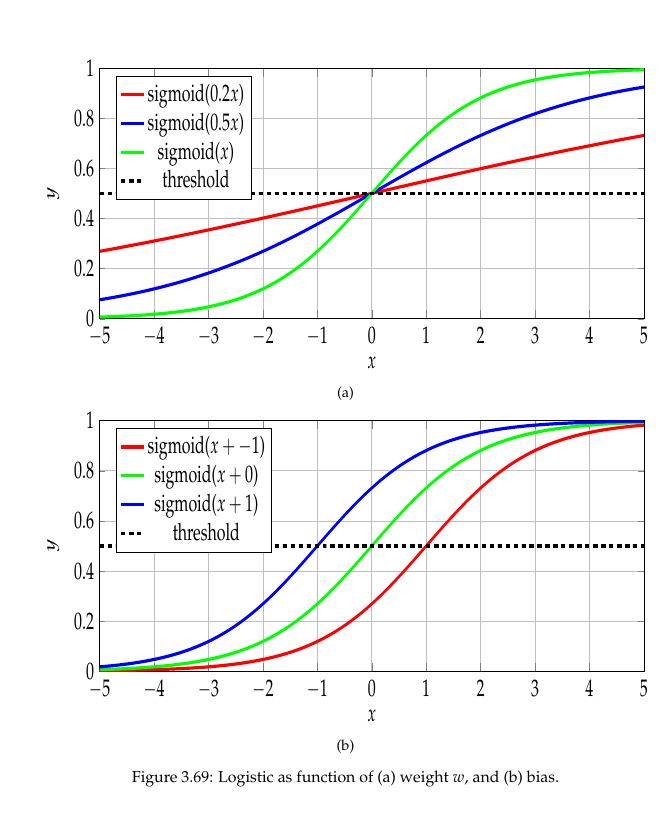

# Iplememtacion del XOR

| $x_1$ | $x_1$ | $x_1 \text{or} x_2$ | 
|---|---|:---:|
1 | 1 |  0 
1 | 0 | 1 
0 | 1 | 1
0 | 0 | 0 

El umbral es $t=1/2$ entoncese escogemos asi

\begin{eqnarray}
y = \left \{
    \begin{array}{cc}
    1  &  \text{ si } h(\Theta, X) \ge t \\
    0 &  \text{ si } h(\Theta,X) < t
    \end{array}
    \right . 
\end{eqnarray}

La red para el XOR de una sola capa como las de la semana pasada
no funciona. Ya lo vimos. Vamos a introducir una capa oculta y ver que esto
resuelveel problema del XOR. Ademas esto sirve de ejemplo y ejercicio para entender el "forward propagation"

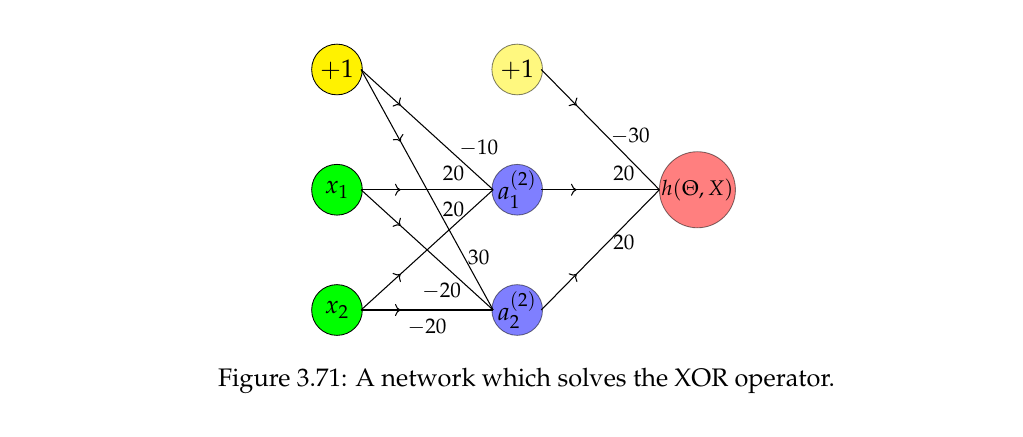

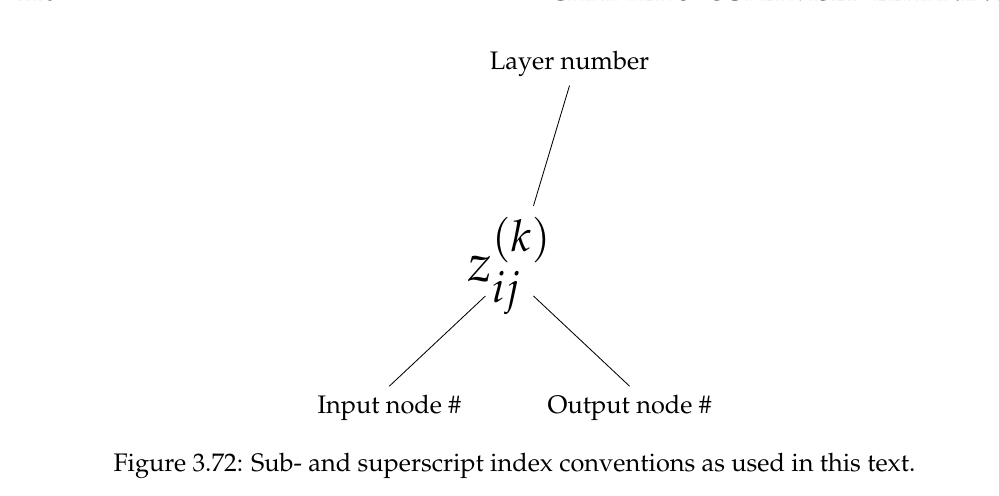

Hagamos los calculos "a mano"

$$(x_1, x_2) = (1, 1)$$ 

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = -10 + 20 + 20 = 30 \\
a_{11}^{(2)} &=&  S(z_{11}^{(2)}) \approx 1 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = 30-40 = -10 \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) \approx 0  
\end{eqnarray}

En este momento acabamos la capa 2 (oculta), vamos para la 3


\begin{eqnarray}
z_{11}^{(3)} &=& -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -30 + 20 + 0 =-10 \\
h(\Theta, x^{(1)}) = S(-10) &=& 4.5397868702434395e-05 < t=0.5
\end{eqnarray}

Como 4.5397868702434395e-05<0.5

$$ \left .  y \right |_{(1,1)} = 0  $$

In [1]:
import numpy as np
def S(x):
    return 1/(1 + np.exp(-x))

In [2]:
S(30)

0.9999999999999065

In [3]:
S(-10)

4.5397868702434395e-05

In [4]:
S(10)

0.9999546021312976

$$(x_1, x_2) = (1, 0)$$ 

\begin{eqnarray}
z_{11}^{(3)} &=& -10 + 20 x_1 + 20 x_2 = -10 + 20 + 0 = 10 \\
a_{11}^{(3)} &=&  S(z_{11}^{(2)}) = 0.9999546021312976 \approx 1 \\
z_{12}^{(3)} &=& 30 - 20 x_1 - 20 x_2 = 30-20 = 10 \\
a_{12}^{(3)} &=& S(z_{12}^{(2)}) \approx 1  
\end{eqnarray}

En este momento acabamos la capa 2 (oculta), vamos para la 3


\begin{eqnarray}
z_{11}^{(3)} &=& -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -30 + 20+ 20 =10 \\
h(\Theta, x^{(1)}) = S(-10) &=& 0.9999546021312976 >  t=0.5
\end{eqnarray}

Como 0.9999546021312976 > 0.5

$$ \left .  y \right |_{(1,0)} = 1  $$

$$(x_1, x_2) = (0, 1)$$ 

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = -10 + 20 + 0 = 10 \\
a_{11}^{(2)} &=&  S(z_{11}^{(2)}) = 0.9999546021312976 \approx 1 \\
z_{12}^{(2)} &=& 30 - 20 x_1 - 20 x_2 = 30-20 = 10 \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) \approx 1  
\end{eqnarray}

En este momento acabamos la capa 2 (oculta), vamos para la 3


\begin{eqnarray}
z_{11}^{(3)} &=& -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -30 + 20+ 20 =10 \\
h(\Theta, x^{(1)}) = S(10) &=& 0.9999546021312976 >  t=0.5
\end{eqnarray}

Como 0.9999546021312976 > 0.5

$$ \left .  y \right |_{(0,1 )} = 1  $$

$$(x_1, x_2) = (0, 0 )$$ 

\begin{eqnarray}
z_{11}^{(2)} &=& -10 + 20 x_1 + 20 x_2 = -10 +0+0 = -10 \\
a_{11}^{(2)} &=&  S(z_{11}^{(2)}) = 0.9999546021312976 \approx 0 \\
z_{12}^{(2)} &=& 30 - 0 - 0  = 30 = 30 \\
a_{12}^{(2)} &=& S(z_{12}^{(2)}) \approx 1  
\end{eqnarray}

En este momento acabamos la capa 2 (oculta), vamos para la 3


\begin{eqnarray}
z_{11}^{(3)} &=& -30 + 20 a_{11}^{(2)} + 20 a_{12}^{(2)} = -30 + 0 + 20 =-10 \\
h(\Theta, x^{(1)}) = S(-10) &=& 4.5397868702434395e-05 <  t=0.5
\end{eqnarray}

Como 4.5397868702434395e-05 < 0.5

$$ \left .  y \right |_{(0,0 )} = 0  $$

In [5]:
S(30)

0.9999999999999065

## Progama en python para la propagacion hacia adelante (forward) del XOR system.

In [6]:
import numpy as np

def s(x):
    return 1/(1 + np.exp(-x))

X = np.array([[0,0], [0,1], [1,0], [1,1 ]])
X


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [8]:
n=len(X)
ones = np.ones( shape=(n,1), dtype='float')
X = np.column_stack((ones, X))
X

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [13]:
Theta1 = np.array([[-10,30], [20,-20], [20,-20]])
Theta1

array([[-10,  30],
       [ 20, -20],
       [ 20, -20]])

In [14]:
Theta2 = np.array([[-30], [20], [20]])
Theta2

array([[-30],
       [ 20],
       [ 20]])

Tenemos todos los datos. Comenzamos a propagar (forward)

In [15]:
Z1 = X.dot(Theta1)
Z1

array([[-10.,  30.],
       [ 10.,  10.],
       [ 10.,  10.],
       [ 30., -10.]])

In [16]:
A1 = s(Z1)
A1

array([[4.53978687e-05, 1.00000000e+00],
       [9.99954602e-01, 9.99954602e-01],
       [9.99954602e-01, 9.99954602e-01],
       [1.00000000e+00, 4.53978687e-05]])

In [17]:
# hacia la capa 3
# agregar unos

A = np.column_stack((ones, A1))
A

array([[1.00000000e+00, 4.53978687e-05, 1.00000000e+00],
       [1.00000000e+00, 9.99954602e-01, 9.99954602e-01],
       [1.00000000e+00, 9.99954602e-01, 9.99954602e-01],
       [1.00000000e+00, 1.00000000e+00, 4.53978687e-05]])

In [18]:
Z2 = A.dot(Theta2)
Z2

array([[-9.99909204],
       [ 9.99818409],
       [ 9.99818409],
       [-9.99909204]])

In [19]:
H = s(Z2)
H

array([[4.54391049e-05],
       [9.99954520e-01],
       [9.99954520e-01],
       [4.54391049e-05]])

In [20]:
t=0.5
B = (H > t)
B

array([[False],
       [ True],
       [ True],
       [False]])

In [21]:
list(map(int, B))

[0, 1, 1, 0]

La **propagacion hacia adelante** es una multiplicacion de matrices intercalada con la activacion $S(t)$. 

7:50 am?


# Backpropagation:

La magia del ML esta en los (tensor de orden 3) $\Theta$. Como los hallamos?
Es un problema de optimizacion. Se resuelve en varios pasos.

1. Definir una funcion de costo
2. Hallar el gradiente de la funcion de costo
3. Usar el metodo de descenso de gradiente (gradiente conjugado no lineal)para obtener el $\Theta$ optimo.

Con ese $\Theta$ se puede probar y si no funciona bien toca volver el ciclo. (cambiair parametros).



## Funcion de costo

La idea es la siguiente. Queremos hallar $\Theta$.

Tenemos las siguientes iteraciones

$$\Theta^{(p)} \leftarrow  \Theta^{(p)} - \alpha \nabla_{\Theta} J $$.

El $\Theta_0$ iniciales son aleatorios. (entre 0,1 o -1,1).
En esa ecuacion $p$ es el orden de la iteracion, no la capa. 
Siendo asi $\Theta$ seria un tensor de orden 4. 
$ijkl$.  $i$,  nodo de entrada, $j$ nodo de salida, el $k$ la capa, $l$ la itereacion.

Usamos la funcion de costo tomada de la regresion logistica.

$$J(\theta) = -\frac1m \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)})] + (1 - y_i) \log[ 1 - h(\theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2  $$

Ahora bien, para la terea, tenemos un problema de multiclase. Vamos a usar
la base de datos:
[MNIST](http://yann.lecun.com/exdb/mnist/) Tiene 10 clases (los digitos 0,1,2,3,4,5,6,7,8,9) Entonces vamos a modificar la funcion de costo parra
includir todas las clases. Sea $K$ el numero de clases.





$$J(\theta) = -\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log [ h_k(\theta, x^{(i)})] + (1 - y_i^{(k)}) \log[ 1 - h_k(\theta, x^{(i)})] + \frac{\lambda}{2m} \sum_{\ell=1}^L \sum_{i=1}^{n_{\ell}} \sum_{j=1}^{n_{\ell+1}} (\Theta_{ij}^{\ell})^2  $$

Para hallar $\Theta$ hay que hallar el gradiente de $J$. 

Comenzamos por recordar la propagacion hacia adelante.


\begin{eqnarray}
A^{(1)} &=& X \\
A^{(2)} &=& S(Z^{(2)}) = S( X \Theta^{(1)})    \\
A^{(3)} &=& S(Z^{(3)}) = S( A^{(2)} \Theta^{(2)} ) \\
&\vdots & \\
A^{(L-1)} &=& S( Z^{(L-1)}) = S( A^{(L-2)} \Theta^{(L-2)}) \\
A^{(L)} &=& S(Z^{(L)}) = S( A^{(L-1)} \Theta^{(L-1)}) \\
A^{(L+1)}) = h(\Theta, X) &=& S(Z^{(L+1)}) = S(A^{(L-1)} \Theta^{(L-1)})   
\end{eqnarray}


Nesitamos hallar

$$ \frac{\partial J(\Theta, X) }{\theta_{ij}^{(\ell)}} $$
$$ \ell=1,2, \cdots L, i=1,2, \cdots, n_{\ell}, j=1,2, \cdots, n_{\ell+1} $$

El primero que debemos hallar es:

$$ \frac{\partial J(\Theta, X}{\partial \Theta_{pq}^{L} } $$

\begin{eqnarray*}
  \frac{\partial J(\Theta, X) } {\partial \Theta^{(L)}_{pq} } &=& 
  -\frac{1}{m} \sum_i \sum_j y_{ij} \frac{\cancel{S_{ij}}(1-S_{ij})}{\cancel{S_{ij}}}  
  \left  (  \sum_k A^{(L)}_{ik} \delta_{pk} \delta_{qj} \right ) \nonumber \\
  \quad \quad &+&   \frac{1}{m} \sum_i \sum_j (1-y_{ij}) 
  \frac{ S_{ij} \cancel{(1-S_{ij})}}{\cancel{1-S_{ij}}}
  \left  (  \sum_k A^{(L)}_{ik} \delta_{pk} \delta_{qj} \right ) \nonumber\\
  &=& \frac{1}{m} \sum_i -y_{iq} (1-S_{iq}) A_{ip}^{(L)}
  + (1- y_{iq}) S_{iq} A_{ip}^{(L)} \nonumber\\
  &=& \frac{1}{m} \sum_i (S_{iq}-y_{iq})A_{ip}^{(L)} \nonumber\\
  &=& \frac{1}{m} \sum_i (A_{iq}^{(L+1)}-y_{iq})A_{ip}^{(L)} \nonumber\\
  &=& \frac{1}{m} (A^{(L)})_p^T ( A^{(L+1)}- Y)_q \;, 
\end{eqnarray*}

Es decir:

$$  \frac{\partial J(\Theta, X) } {\partial \Theta^{(L)}_{pq} } =\frac{1}{m} (A^{(L)})_p^T ( A^{(L+1)}- Y)_q  $$


......en las notas se muestra como se calcula las derivadas parciales con respecto a las capas anteriores.....





where we omit the argument of the $S$ function  to avoid cluttering, and we write the result
in more compact (matrix) form. On the right side of the last expression, we have the inner
product of the $p$th column of $A^{(L)}$ with the $q$th column of
$A^{(L+1)}-Y$.  This is a vectorized form of the gradient with respect to the $\Theta^{(L)}$
weight, the weighting matrix that produces the final prediction. We can express this in
matrix form as 
\begin{eqnarray*}
  \left ( \frac{\partial J(\Theta, X) }{\partial \Theta^{(L)}} \right )_{pq} = 
  \frac{1}{m} \left ( (A^{(L)})^T ( A^{(L+1)}- Y ) \right )_{pq} .
\end{eqnarray*}

Now, we want to take the derivative with respect to the weighting matrix that generated the last hidden layer, $\Theta_{pq}^{(L-1)}$.
Here, we use the chain rule. We write
\begin{eqnarray}
  h_{ij}(\Theta,X) &=& S \left ( \sum_k A_{ik}^{(L)} \Theta_{kj}^{(L)} \right ) 
  =A_{ij}^{(L+1)} \\
  A_{ik}^{(L)} &=& S(Z_{ik}^{(L)}) = S \left (\sum_r A_{ir}^{(L-1)} \Theta_{rk}^{(L-1)} 
  \right ) \, .
\end{eqnarray}
We take the derivative of the log functions. Because $A_{ir}^{(L-1)}$ and $\Theta_{kj}^{(L)}$ do not depend on $\Theta_{pq}^{(L-1)}$,
\begin{eqnarray*}
  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} &=& 
  \frac{1}{\cancel{S_{ij}}} \cancel{S_{ij}} (1-S_{ij}) 
  \sum_k 
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} 
  \\
  &=& (1 - A_{ij}^{(L+1)})   \sum_k  
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \;.
\end{eqnarray*}
We should find
$\frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}}$. That is, 
from calling $S=A^{(L)}$ and equation~\ref{aikl}
\begin{eqnarray*}
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}}
  = S_{ik}(1-S_{ik}) \sum_r  A_{ir}^{(L-1)} \delta_{rp} \delta_{kq}
  = A_{ik}^{(L)} (1 - A_{ik}^{(L)} ) A_{ip}^{(L-1)} \delta_{kq} \,,
\end{eqnarray*}
so,
\begin{eqnarray*}
  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} 
  &=& (1 - A_{ij}^{(L+1)}) \left (  
  A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)}
  \Theta_{qj}^{(L)} \right )  \;.
\end{eqnarray*}
Similarly, we find
\begin{eqnarray*}
  \frac{\partial (\log ( 1- h_{ij} (\Theta, X) ))}{\partial \Theta_{pq}^{(L-1)}} &=& 
  -\frac{1}{\cancel{1-S_{ij}}}{S_{ij}} \cancel{(1-S_{ij}}) 
  \sum_k 
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)}  \\
  &=& - A_{ij}^{(L+1)}  \sum_k  
  \frac{\partial A_{ik}^{(L)}}{\partial \Theta_{pq}^{(L-1)}} \Theta_{kj}^{(L)} \\
  &=& - A_{ij}^{(L+1)}  
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)} 
  \right ) \,.
\end{eqnarray*}
Then,
\begin{eqnarray*}
  && y_{ij}  \frac{\partial \log ( h_{ij} (\Theta, X) )}{\partial \Theta_{pq}^{(L-1)}} 
  + (1-y_{ij}) 
  \frac{\partial \log [1-h_{ij} (\Theta, X) )]}{\partial \Theta_{pq}^{(L-1)}} =  \\
  && \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}  \right )
  [ y_{ij} (1- A_{ij}^{(L+1)})  - (1-y_{ij}) A_{ij}^{L+1}) ] \\
  &=& 
  (y_{ij} - A_{ij}^{(L+1)}) 
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}   \right )\,.
\end{eqnarray*}
Using equation~\ref{firstdJdt},
\begin{eqnarray*}
  \frac{\partial J(\Theta, X) } {\partial \Theta^{(L-1)}_{pq} } &=& 
  \frac{1}{m} \sum_i \sum_j 
  (A_{ij}^{(L+1)} - y_{ij})
  \left ( A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \Theta_{qj}^{(L)}  \right ) \\
  &=&
  \frac{1}{m} \sum_i 
  A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  \sum_j
  (A_{ij}^{(L+1)} - y_{ij})
  \Theta_{qj}^{(L)}    \\
  &=&
  \frac{1}{m} \sum_i 
  A_{iq}^{(L)} (1 - A_{iq}^{(L)} ) A_{ip}^{(L-1)} 
  [(A^{(L+1)}-Y) (\Theta^{(L)})^T]_{iq}  \\
  &=& \frac{1}{m} \sum_i  A_{ip}^{(L-1)} 
  [(A^{(L+1)}-Y) (\Theta^{(L)})^T]_{iq} A_{iq}^{(L)} (1 - A_{iq}^{(L)} )  \\
  &=& \frac{1}{m} \sum_i  A_{ip}^{(L-1)} 
  [(A^{(L+1)}-Y) (\Theta^{(L)})^T]_{iq} [ A^{(L)} .*  (1 - A^{(L)} )]_{iq} \\
  &=& \frac1m [( A^{(L-1)})^T ]_p [ (A^{(L+1)}-Y) (\Theta^{(L)})^T   A^{(L)} .*  
  (1 - A^{(L)} ) ]_q \,,
\end{eqnarray*}
where ``$.*$'' is the Hadamard product, with the same notation as used in {\Oc}. \rm
In general, we can write
\begin{eqnarray}
  \frac{\partial J(\Theta, X) } {\partial \Theta^{(I)}_{pq} } = 
  \frac{1}{m} (A^{(I)})_p^T  \left [ [(A^{(I+2)}-Y) (\Theta^{(I+1)})^T]
\left ( A^{(I+1)} .*(1- A^{(I+1)} )  \right ) \right ]_q\,,
  \end{eqnarray}
  with $I=L, L-1,L-2, \cdots , 1$.  With this, we are ready to create an algorithm of backpropagation
  which we show in vectorized form. Initially, we perform forward propagation based on
  Algorithm~\ref{neuralnetalg} and equations~\ref{forprop}.  That is, we find the activations
  in all layers, starting with $A^{(1)}=X$, and hidden layers $A^{i}$ ($i=2, \hdots ,  L$), and  finally activation matrix $A^{(L+1)}=h(\Theta, X)$.  After completing the forward propagation
  through the network, we use equation~\ref{eq:dJdt} to begin and iteratively use
  equation~\ref{backproeqs} to adjust the weighting matrices.  In expression~\ref{backproeqs},
  we embrace all terms with subindex $q$ along the same square bracket. We show the pseudocode
  in Algorithm~\ref{backpropalg}.  


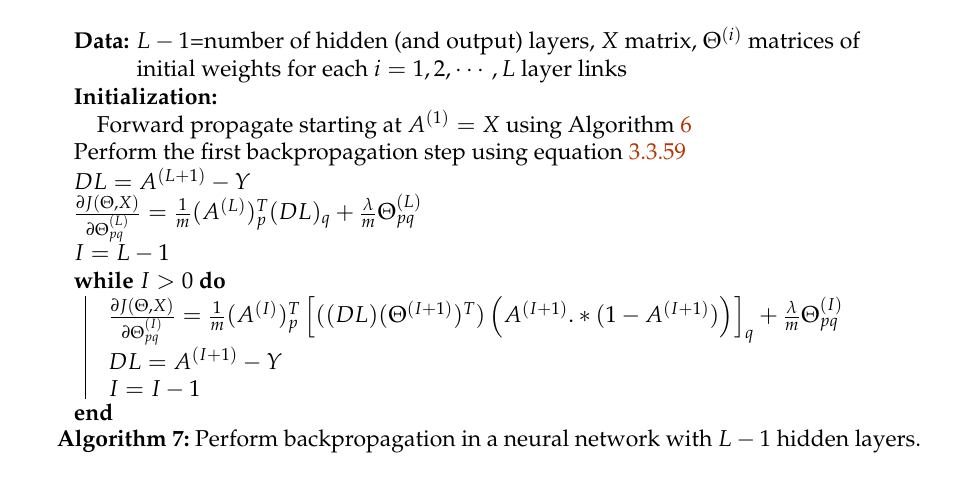